# TP 3 TSP

Questions
Après familiarisation avec le code proposé, répondre aux questions suivantes :
1. Visualisation : Le programme proposé génère des instances du problème sous la forme d’une
matrice des distances. Afin d’améliorer la visualisation des solutions proposés, procédez de la
manière suivante :
    - Chaque ville à visiter a des coordonnées cartésiennes (X,Y) générées aléatoirement
    - La matrice des distances entre les villes est calculée en utilisant la distance
euclidienne
    - Afficher les points et la tournée proposée (droite liant chaque paire de points
successifs)
2. Faites varier les paramètres du programme de telle sorte à traiter des problèmes de tailles
différentes (4 à 20 villes). Faites aussi varier les paramètres du recuit simulé, et représenter
graphiquement l’évolution du coût de la solution en fonction du nombre d’itérations.
3. Programmer l’algorithme génétique permettant de résoudre le TSP (Vous pouvez vous
inspirer du TP précédent et des éléments présentés dans TSPexemple.py).
    - Choisir les paramètres du croisement et de la mutation en fonction des résultats
observés
4. Programmer l’algorithme de colonies de fourmis adapté au TSP :
    - Choisir les paramètres de l’algorithme en fonction des résultats observés
5. Comparer les trois approches du point de vue de la qualité des solutions proposées et du
temps de calcul. Pour ce faire, générer des instances représentatives (minimum 4) du
problème TSP.

Chaque ville à visiter a des coordonnées cartésiennes (X,Y) générées aléatoirement

In [13]:
import random
import numpy as np
import TSPexemple1 as tsp
import matplotlib.pyplot as plt

In [4]:
def generate_random_cities(nb_cities):
    cities = []
    for i in range(nb_cities):
        cities.append((random.random(), random.random()))
    return cities

print(generate_random_cities(10))

[(0.6901461812259873, 0.9559178611920954), (0.21637481812933157, 0.43834081492212684), (0.9774025350278002, 0.5099528472659621), (0.5111480962893334, 0.4924516245070619), (0.6378235340586361, 0.9608465651459728), (0.5801557787196426, 0.46434323601808236), (0.026167681062908343, 0.3891456431879644), (0.7932317211226969, 0.7505617774131765), (0.8309325556275192, 0.33217826247782123), (0.04430088649801811, 0.9238184842890034)]


La matrice des distances entre les villes est calculée en utilisant la distance euclidienne

In [7]:
def distance_entre_2_ville(coordonnees):
    ville_1 = coordonnees[0]
    ville_2 = coordonnees[1]
    distance = ((ville_1[0] - ville_2[0])**2 + (ville_1[1] - ville_2[1])**2)**0.5
    return distance

def matrice_distance_ville(coordonnees):
    distances = np.zeros((len(coordonnees), len(coordonnees)))
    for i in range(len(coordonnees)):
        for j in range(len(coordonnees)):
            if i != j:
                # print("Distance entre la ville", i, "et la ville", j, ":", distance_entre_2_ville((coordonnees[i], coordonnees[j])))
                distances[i][j] = distance_entre_2_ville((coordonnees[i], coordonnees[j]))
    return distances

print(matrice_distance_ville(generate_random_cities(10)))

[[0.         0.80049075 0.96754574 0.26490691 0.77313565 0.56689826
  0.30342461 0.90379195 0.57929054 0.78950566]
 [0.80049075 0.         0.2200433  0.58088658 0.39168983 0.57757443
  0.50592472 0.55310534 0.68493686 0.5848076 ]
 [0.96754574 0.2200433  0.         0.72210573 0.35063858 0.79761343
  0.66430235 0.45568027 0.71731782 0.53870079]
 [0.26490691 0.58088658 0.72210573 0.         0.50824349 0.55763285
  0.093543   0.64346906 0.36908758 0.53781147]
 [0.77313565 0.39168983 0.35063858 0.50824349 0.         0.83134199
  0.49299724 0.18002641 0.37822932 0.19645786]
 [0.56689826 0.57757443 0.79761343 0.55763285 0.83134199 0.
  0.47622167 1.01035701 0.89711927 0.96647418]
 [0.30342461 0.50592472 0.66430235 0.093543   0.49299724 0.47622167
  0.         0.64585554 0.42762882 0.55665883]
 [0.90379195 0.55310534 0.45568027 0.64346906 0.18002641 1.01035701
  0.64585554 0.         0.4073193  0.14358644]
 [0.57929054 0.68493686 0.71731782 0.36908758 0.37822932 0.89711927
  0.42762882 0.40731

On va utiliser l'algorithme de recuit simulé pour résoudre le problème du TSP et plus particulièrement celui proposé en exemple : 

In [10]:
# recuit_simule(nombre_de_ville, distances, T, facteur, tour)

NOMBRE_DE_VILLES = 10
TEMPERATURE = 1000
FACTEUR = 0.99
TOUR = 1000

coor_ville = generate_random_cities(NOMBRE_DE_VILLES)
distances_ville = matrice_distance_ville(coor_ville)

ordre_ville, distance_totale = tsp.recuit_simule(NOMBRE_DE_VILLES, distances_ville, TEMPERATURE, FACTEUR, TOUR)

[0, 9, 6, 4, 2, 5, 7, 1, 8, 3] 3.0345097562471297


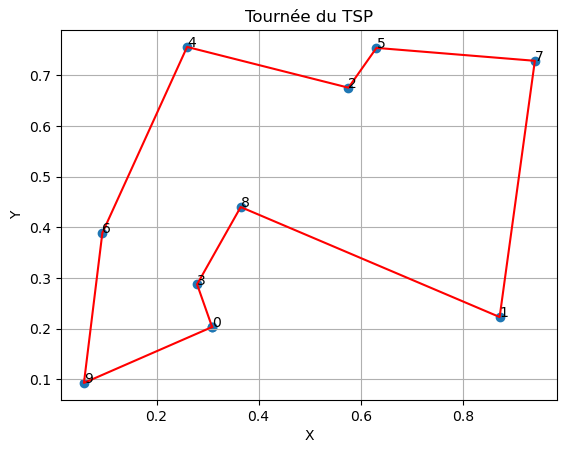

In [17]:
print(ordre_ville, distance_totale)

def afficaghe(coor_ville_p, ordre_ville_p):
    # Extraction des coordonnées dans l'ordre de visite
    x = [coor_ville_p[i][0] for i in ordre_ville_p]
    y = [coor_ville_p[i][1] for i in ordre_ville_p]
    
    # Ajout du point de départ à la fin pour fermer la boucle
    x.append(x[0])
    y.append(y[0])
    
    # Affichage des points
    plt.scatter(x, y)
    
    # Affichage de la tournée
    plt.plot(x, y, 'r')
    
    # Ajout d'étiquettes pour chaque point
    for i in range(len(ordre_ville_p)):
        plt.annotate(ordre_ville_p[i], (x[i], y[i]))
    
    # Affichage du graphique
    plt.title("Tournée du TSP")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

afficaghe(coor_ville, ordre_ville)

Faites varier les paramètres du programme de telle sorte à traiter des problèmes de tailles différentes (4 à 20 villes). Faites aussi varier les paramètres du recuit simulé, et représenter graphiquement l’évolution du coût de la solution en fonction du nombre d’itérations.

In [69]:
NOMBRE_DE_VILLES = 15 # 10
TEMPERATURE = 10000 # *10
FACTEUR = 0.999 # 0.99
TOUR = 50000 # *5

coor_ville = generate_random_cities(NOMBRE_DE_VILLES)
distances_ville = matrice_distance_ville(coor_ville)

for i in range(1000, TOUR, 10000):
    ordre_ville, distance_totale = tsp.recuit_simule(NOMBRE_DE_VILLES, distances_ville, TEMPERATURE, FACTEUR, i)
    print(f"Le nombre d'itération est  {i}, la distance {distance_totale}")

Le nombre d'itération est  1000, la distance 4.360363119757628
Le nombre d'itération est  11000, la distance 3.706899979244443
Le nombre d'itération est  21000, la distance 3.5222585529123727
Le nombre d'itération est  31000, la distance 3.522258552912373
Le nombre d'itération est  41000, la distance 3.522258552912373


Programmer l’algorithme génétique permettant de résoudre le TSP (Vous pouvez vous inspirer du TP précédent et des éléments présentés dans TSPexemple.py).
    - Choisir les paramètres du croisement et de la mutation en fonction des résultats observés

In [19]:
def population_initiale(nombre_ville, taille_population):
    population = []
    for i in range(taille_population):
        population.append(np.random.permutation(nombre_ville))
    return population

print(population_initiale(10, 10))

[array([3, 1, 0, 9, 2, 7, 5, 8, 6, 4]), array([4, 0, 8, 6, 9, 1, 7, 3, 5, 2]), array([0, 9, 8, 6, 2, 1, 4, 7, 3, 5]), array([2, 3, 4, 1, 8, 0, 7, 9, 6, 5]), array([9, 4, 5, 0, 1, 8, 7, 3, 6, 2]), array([9, 4, 2, 1, 3, 8, 6, 7, 5, 0]), array([9, 1, 4, 3, 6, 0, 7, 8, 5, 2]), array([4, 5, 7, 2, 0, 8, 1, 3, 9, 6]), array([0, 8, 9, 7, 2, 1, 5, 6, 3, 4]), array([3, 7, 1, 4, 5, 9, 6, 0, 2, 8])]


In [20]:
def evaluation_totale(population, distances, nombre_ville):
    evaluation = []
    for i in range(len(population)):
        evaluation.append(tsp.cal_distance(population[i], distances, nombre_ville))
    return evaluation

print(evaluation_totale(population_initiale(10, 10), distances_ville, 10))

[4.04267119860224, 5.710184460697064, 2.9514856179505533, 4.2508019724108, 4.288580233806029, 4.654174941830818, 4.858105329349414, 4.5582922605055884, 4.801891673726194, 4.511397863186843]


In [22]:
# Selection par la méthode de la roulette des deux parents

def selection_roulette(population, evaluation):
    somme = sum(evaluation)
    proba = [i/somme for i in evaluation]
    proba_cumul = np.cumsum(proba)
    parents = []
    index_parent = []
    for i in range(2):
        alea = random.random()
        for j in range(len(proba_cumul)):
            if alea < proba_cumul[j]:
                parents.append(population[j])
                index_parent.append(j)
                break
    return parents, index_parent

print(selection_roulette(population_initiale(10, 10), evaluation_totale(population_initiale(10, 10), distances_ville, 10)))

[array([7, 9, 4, 1, 2, 8, 6, 0, 5, 3]), array([5, 0, 2, 1, 7, 9, 8, 6, 3, 4])]


In [25]:
# Mutation par inversion de deux villes

def mutation_inversion(individu):
    mutation = individu.copy()
    alea = random.randint(0, len(individu)-1)
    alea2 = random.randint(0, len(individu)-1)
    mutation[alea], mutation[alea2] = mutation[alea2], mutation[alea]
    return mutation

print(mutation_inversion([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

[3, 1, 2, 0, 4, 5, 6, 7, 8, 9]


In [49]:
# Croisement en 1 point

def croisement(enfants):
    enfant_1 = enfants[0]
    enfant_2 = enfants[1]
    alea = random.randint(0, len(enfant_1)-1)
    enfant_1[alea:], enfant_2[alea:] = enfant_2[alea:], enfant_1[alea:]
    return enfant_1, enfant_2

print(croisement([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]]))

[[0, 1, 2, 3, 4, 5, 3, 2, 1, 0], [9, 8, 7, 6, 5, 4, 6, 7, 8, 9]]


In [44]:
# Correction d'un individu

def reparer_individu(individu):
    taille_individu = len(individu)
    villes_manquantes = set(range(taille_individu)) - set(individu)
    villes_doubles = set([x for x in individu if individu.count(x) > 1])
    
    # Créer une copie de l'individu pour éviter de modifier l'original pendant l'itération
    individu_repare = individu[:]
    for ville in villes_doubles:
        while individu_repare.count(ville) > 1:
            index_ville_double = individu_repare.index(ville, individu_repare.index(ville) + 1)
            ville_manquante = villes_manquantes.pop()
            individu_repare[index_ville_double] = ville_manquante

    return individu_repare

print(reparer_individu([9, 1, 2, 3, 5, 5, 6, 7, 8, 9]))

[9, 1, 2, 3, 5, 4, 6, 7, 8, 0]


In [65]:
# Algorithme génétique

def algorithme_genetique(distances, nombre_ville, nombre_iter, proba_mutation, taille_population):
    population = population_initiale(nombre_ville, taille_population)
    for i in range(nombre_iter):
        evaluation = evaluation_totale(population, distances, nombre_ville)
        parents = selection_roulette(population, evaluation)
        enfants = croisement(parents)
        # On répare les enfants
        # Conversion en liste de listes
        enfants = [list(arr) for arr in enfants]
        enfants[0] = reparer_individu(enfants[0])
        enfants[1] = reparer_individu(enfants[1])
        # On remplace les parents par les enfants s'ils sont meilleurs
        if tsp.cal_distance(enfants[0], distances, nombre_ville) < tsp.cal_distance(parents[0], distances, nombre_ville):
            population[parents[1][0]] = enfants[0]
        if tsp.cal_distance(enfants[1], distances, nombre_ville) < tsp.cal_distance(parents[1], distances, nombre_ville):
            population[parents[1][1]] = enfants[1]
        # On mute la population au hasard
        for j in range(len(population)):
            if random.random() < proba_mutation:
                population[j] = reparer_individu(list(mutation_inversion(population[j])))
    # On cherche le meilleur individu
    evaluation = evaluation_totale(population, distances, nombre_ville)
    index_meilleur = evaluation.index(min(evaluation))
    best_individu = population[index_meilleur]
    return best_individu, min(evaluation)

[7, 0, 1, 3, 5, 8, 9, 4, 6, 2] 3.9841954491012554


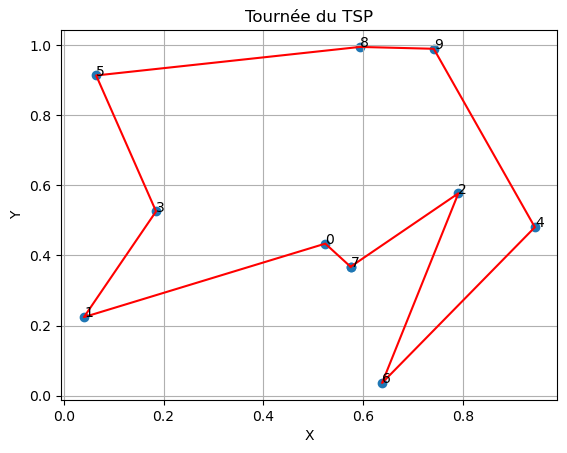

In [68]:
# Test de l'algorithme génétique

NOMBRE_DE_VILLES = 10
NOMBRE_ITER = 10000
PROBA_MUTATION = 0.1
TAILLE_POPULATION = 1000

coor_ville = generate_random_cities(NOMBRE_DE_VILLES)
distances_ville = matrice_distance_ville(coor_ville)

meilleur_individu, distance_totale = algorithme_genetique(distances_ville, NOMBRE_DE_VILLES, NOMBRE_ITER, PROBA_MUTATION, TAILLE_POPULATION)
print(f"Le meilleur individu est {meilleur_individu} avec une distance de {distance_totale}")

afficaghe(coor_ville, meilleur_individu)

Programmer l’algorithme de colonies de fourmis adapté au TSP :
    - Choisir les paramètres de l’algorithme en fonction des résultats observés

In [74]:
import numpy as np

def ant_colony_optimization(distances, n_fourmis, n_best, n_iterations, declin, alpha, beta):
    n_villes = distances.shape[0]

    # Initialisation du dépôt de phéromones
    pheromone = np.ones((n_villes, n_villes)) / n_villes
    # Garder la trace de la meilleure solution
    plus_court_chemin = None
    meilleur_distance = float('inf')

    for _ in range(n_iterations):
        tous_chemins = []
        toutes_distances = []

        for _ in range(n_fourmis):
            chemin = [np.random.randint(0, n_villes)]  # Commencer à une ville aléatoire
            while len(chemin) < n_villes:
                ville_actuelle = chemin[-1]
                # Calculer la probabilité de transition pour la prochaine ville
                probabilites = np.zeros(n_villes)
                for ville_suivante in range(n_villes):
                    if ville_suivante not in chemin:
                        trace = pheromone[ville_actuelle, ville_suivante] ** alpha
                        visibilite = (1.0 / distances[ville_actuelle, ville_suivante]) ** beta
                        probabilites[ville_suivante] = trace * visibilite
                # Normaliser pour obtenir des probabilités
                probabilites /= probabilites.sum()
                # Choisir la prochaine ville
                ville_suivante = np.random.choice(n_villes, p=probabilites)
                chemin.append(ville_suivante)

            tous_chemins.append(chemin)
            # Calculer la longueur du chemin
            distance = sum([distances[chemin[i], chemin[i+1]] for i in range(-1, n_villes-1)])
            toutes_distances.append(distance)

            # Vérifier si nous avons une nouvelle meilleure solution
            if distance < meilleur_distance:
                meilleur_distance = distance
                plus_court_chemin = chemin

        # Trier les fourmis - les meilleures en premier
        fourmies_triees = np.argsort(toutes_distances)
        # Mise à jour du dépôt de phéromones
        pheromone *= declin
        for i in range(n_best):
            for j in range(-1, n_villes-1):
                pheromone[tous_chemins[fourmies_triees[i]][j], tous_chemins[fourmies_triees[i]][j+1]] += 1.0 / toutes_distances[fourmies_triees[i]]

    return plus_court_chemin, meilleur_distance

# Données du problème TSP (matrice de distance)

NOMBRE_DE_VILLES = 10
NOMBRE_ITER = 10000
PROBA_MUTATION = 0.1
TAILLE_POPULATION = 1000

coor_ville = generate_random_cities(NOMBRE_DE_VILLES)
distances_ville = matrice_distance_ville(coor_ville)

DISTANCES = distances_ville

# Paramètres de l'algorithme
N_FOURMIS = 10
N_BEST = 5
N_ITERATIONS = 100
DECLIN = 0.95
ALPHA = 1
BETA = 2

# Lancer l'algorithme
plus_court, meilleur_dist = ant_colony_optimization(DISTANCES, N_FOURMIS, N_BEST, N_ITERATIONS, DECLIN, ALPHA, BETA)

print("Meilleur chemin trouvé:", plus_court)
print("Distance du meilleur chemin:", meilleur_dist)


Meilleur chemin trouvé: [5, 8, 9, 7, 6, 3, 0, 4, 2, 1]
Distance du meilleur chemin: 3.4164555031306554


Comparer les trois approches du point de vue de la qualité des solutions proposées et du temps de calcul. Pour ce faire, générer des instances représentatives (minimum 4) du problème TSP.